In [2]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
pd.set_option('display.max_rows',25)
pd.set_option('display.max_colwidth', 500)

In [4]:
with open('../data/data_final_dtypes.json', 'r') as f:
    dtypes = json.load(f)

In [5]:
df = pd.read_csv('../data/data_final.csv', dtype=dtypes)

In [7]:
df.date = pd.to_datetime(df.date)

In [74]:
# Race population percentages in US: https://en.wikipedia.org/wiki/Demographics_of_the_United_States#Race
race_perc = {
'white':0.615,
'black':0.123,
'hispanic':0.176,
'asian':0.053,
'native american':0.007,
'middle eastern':0.003,}

In [82]:
race_counts = df.race.value_counts()
race_counts = pd.DataFrame(race_counts)
race_counts.rename(index={'asian/pacific islander': 'asian'}, inplace=True)
race_counts['pop_perc']=race_counts.index.map(race_perc)

In [83]:
# Average percantage of population killed every year by police per race (average total population 310m 2000-2020)
race_counts['death_perc']=race_counts.race*100/(310000000*race_counts.pop_perc*20)

<AxesSubplot:>

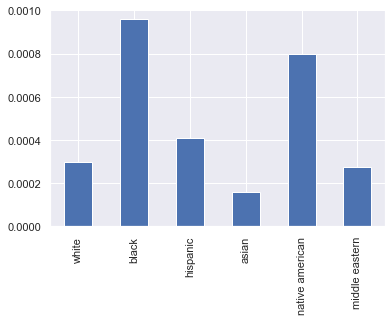

In [84]:
# refine pending
race_counts.death_perc.plot.bar()

<AxesSubplot:>

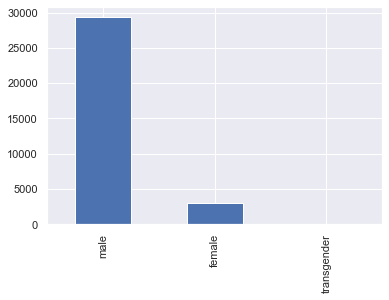

In [85]:
# refine pending
df.gender.value_counts().plot.bar()

In [86]:
age_race = df.pivot_table(index = df.index, columns=['race'], values='age')

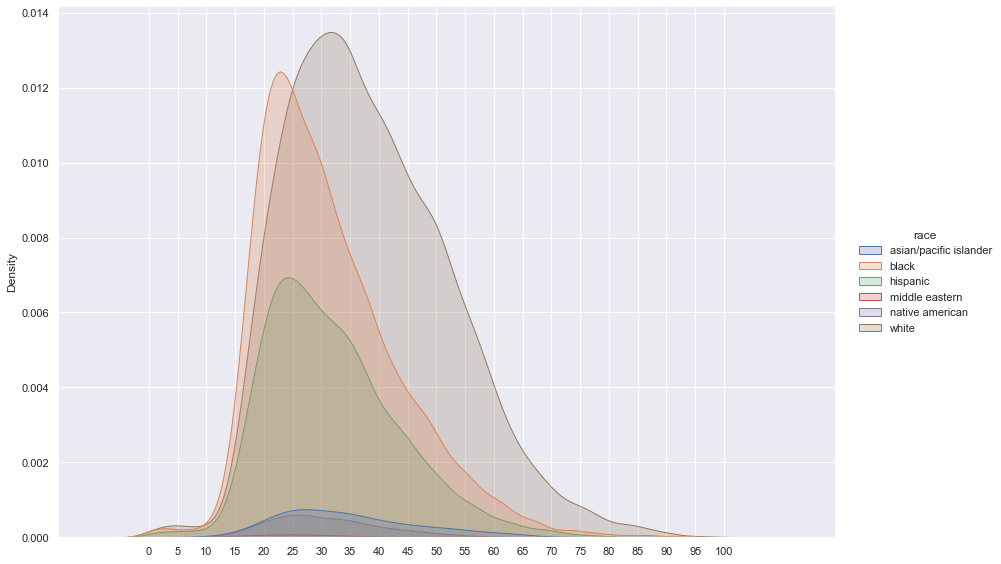

In [94]:
# refine pending
fig = sns.displot(data=age_race, kind='kde', fill=True, height=8, aspect=1.5)
fig.set(xticks=range(0,105,5))

<AxesSubplot:>

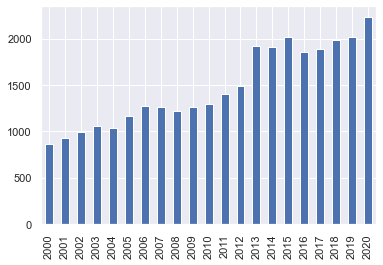

In [119]:
# refine pending
yearly_deaths = pd.DatetimeIndex(df.date).year
yearly_deaths.drop(2021).value_counts().sort_index(ascending=True).plot.bar()

In [120]:
df.age_groups.map(print)

name
date
state
age
age_groups
gender
race
address
city
latitude
longitude
zipcode
county
agency
death_cause
weapon
threat
fleeing
intended_force
encounter_type
disposition
mental_symptoms
description_x
description_y
_merge


Index([None, None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None, None,
       None],
      dtype='object')

In [147]:
df.agency.value_counts()

Los Angeles Police Department                                                     512
Chicago Police Department                                                         450
Los Angeles County Sheriff's Department                                           389
Houston Police Department                                                         361
City of New York Police Department                                                339
                                                                                 ... 
Spencer County Sheriff's Office                                                     1
Colorado River Indian Tribes Police Department, La Paz County Sheriff's Office      1
Colfax Town Marshall                                                                1
Lake Township Police Department, Perrysburg Township Police Department              1
Ellwood City Police Department                                                      1
Name: agency, Length: 6865, dtype: int64

In [139]:
df[df.disposition=='convicted'].description_x.head(100)

426                                                                                                    Stabbed to death by off-duty police officer who was sentence to four life sentences for the crimes.
427                                                                                                    Stabbed to death by off-duty police officer who was sentence to four life sentences for the crimes.
428                                                                                                    Stabbed to death by off-duty police officer who was sentence to four life sentences for the crimes.
429                                                                                                    Stabbed to death by off-duty police officer who was sentence to four life sentences for the crimes.
688      After drinking at two locations, Clyde Arakawa, an off-duty Honolulu police officer, collided with Hale'iwa resident Dana Ambrose, 19. Ambrose was killed. Arakawa was convicted of